# Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y

    наиболее похожий пользователь на пользователя x).
    b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы
    это сделаете?

# Задание 2
Упражнения по вычислению производных (на python и на бумаге)

# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите
оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

# Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50.
Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

# ---------------------------------------------------------------

#                       Решение

# Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)) a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y

наиболее похожий пользователь на пользователя x).
b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы
это сделаете?

In [1]:


import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline



In [7]:
raitings=np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
#   Создаем датасет для 10 человек и 15 фильмов с разными характеристиками


In [8]:
#mov_s=np.around(movies, decimals=5)
mov_s = raitings

In [9]:
import pandas as pd

###### делаю более все наглядно со строками и колонками


In [10]:
pd.DataFrame(mov_s)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4,4,9,4,1,6,10,7,9,6,9,2,8,6,6
1,9,2,5,10,7,8,10,5,6,2,1,6,8,9,7
2,1,6,8,8,4,9,3,8,10,5,2,6,8,1,6
3,6,1,9,7,7,9,2,3,5,1,6,6,3,2,7
4,3,7,3,5,7,9,9,6,2,9,1,2,8,10,6
5,8,3,7,3,8,6,1,8,8,6,1,9,4,10,1
6,9,8,4,8,8,10,6,1,1,2,9,5,2,7,2
7,4,1,6,4,3,10,4,4,2,8,7,9,3,8,3
8,2,7,7,6,10,6,8,9,8,6,10,1,7,10,4
9,5,10,8,8,9,7,2,9,9,10,8,8,8,6,10


In [11]:
user_1 = mov_s[0]
user_2 = mov_s[1]
user_3 = mov_s[2]
user_4 = mov_s[3]
user_5 = mov_s[4]
user_6 = mov_s[5]
user_7 = mov_s[6]
user_8 = mov_s[7]
user_9 = mov_s[8]
user_10 = mov_s[9]

  

In [12]:
import matplotlib.pyplot as plt

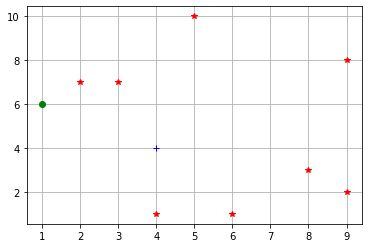

In [13]:
plt.figure()
plt.plot(user_1[0], user_1[1], 'b+')
plt.plot(user_2[0], user_2[1], 'r*')
plt.plot(user_3[0], user_3[1], 'go')
plt.plot(user_4[0], user_4[1], 'r*')
plt.plot(user_5[0], user_5[1], 'r*')
plt.plot(user_6[0], user_6[1], 'r*')
plt.plot(user_7[0], user_7[1], 'r*')
plt.plot(user_8[0], user_8[1], 'r*')
plt.plot(user_9[0], user_9[1], 'r*')
plt.plot(user_10[0], user_10[1], 'r*')
plt.grid()
plt.show()

######  a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого 

In [14]:
def cosinus(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [15]:
cosinus(user_1, user_2)

0.8260291914926011

In [16]:
u1 = ([cosinus(user_1, user_1),cosinus(user_1, user_2),cosinus(user_1, user_3),cosinus(user_1, user_4), 
       cosinus(user_1, user_5), cosinus(user_1, user_6), cosinus(user_1, user_7),
      cosinus(user_1, user_8), cosinus(user_1, user_9), cosinus(user_1, user_10)])


In [17]:
u2 = ([cosinus(user_2, user_1),cosinus(user_2, user_2), cosinus(user_2, user_3),cosinus(user_2, user_4), 
       cosinus(user_2, user_5), cosinus(user_2, user_6), cosinus(user_2, user_7),
      cosinus(user_2, user_8), cosinus(user_2, user_9), cosinus(user_2, user_10)])

u3 = ([cosinus(user_3, user_1),cosinus(user_3, user_2), cosinus(user_3, user_3),cosinus(user_3, user_4), 
       cosinus(user_3, user_5), cosinus(user_3, user_6), cosinus(user_3, user_7),
      cosinus(user_3, user_8), cosinus(user_3, user_9), cosinus(user_3, user_10)])

u4 = ([cosinus(user_4, user_1),cosinus(user_4, user_2), cosinus(user_4, user_3),cosinus(user_4, user_4), 
       cosinus(user_4, user_5), cosinus(user_4, user_6), cosinus(user_4, user_7),
      cosinus(user_4, user_8), cosinus(user_4, user_9), cosinus(user_4, user_10)])

u5 = ([cosinus(user_5, user_1),cosinus(user_5, user_2), cosinus(user_5, user_3),cosinus(user_5, user_4), 
       cosinus(user_5, user_5), cosinus(user_5, user_6), cosinus(user_5, user_7),
      cosinus(user_5, user_8), cosinus(user_5, user_9), cosinus(user_5, user_10)])

u6 = ([cosinus(user_6, user_1),cosinus(user_6, user_2), cosinus(user_6, user_3),cosinus(user_6, user_4), 
       cosinus(user_6, user_5), cosinus(user_6, user_6), cosinus(user_6, user_7),
      cosinus(user_6, user_8), cosinus(user_6, user_9), cosinus(user_6, user_10)])

u7 = ([cosinus(user_7, user_1),cosinus(user_7, user_2), cosinus(user_7, user_3),cosinus(user_7, user_4), 
       cosinus(user_7, user_5), cosinus(user_7, user_6), cosinus(user_7, user_7),
      cosinus(user_7, user_8), cosinus(user_7, user_9), cosinus(user_7, user_10)])

u8 = ([cosinus(user_8, user_1),cosinus(user_8, user_2), cosinus(user_8, user_3),cosinus(user_8, user_4), 
       cosinus(user_8, user_5), cosinus(user_8, user_6), cosinus(user_8, user_7),
      cosinus(user_8, user_8), cosinus(user_8, user_9), cosinus(user_8, user_10)])

u9 = ([cosinus(user_9, user_1),cosinus(user_9, user_2), cosinus(user_9, user_3),cosinus(user_9, user_4), 
       cosinus(user_9, user_5), cosinus(user_9, user_6), cosinus(user_9, user_7),
      cosinus(user_9, user_8), cosinus(user_9, user_9), cosinus(user_9, user_10)])

u10 = ([cosinus(user_10, user_1),cosinus(user_10, user_2), cosinus(user_10, user_3),cosinus(user_10, user_4), 
       cosinus(user_10, user_5), cosinus(user_10, user_6), cosinus(user_10, user_7),
      cosinus(user_10, user_8), cosinus(user_10, user_9), cosinus(user_10, user_10)])

In [18]:
u=np.array([u1, u2, u3, u4,u5,u6,u7,u8,u9,u10])

In [19]:
pd.DataFrame(data=u, index= [1,2,3,4,5,6,7,8,9,10], columns=[1,2,3,4,5,6,7,8,9,10])

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.826029,0.849215,0.783401,0.819176,0.741185,0.727358,0.809675,0.910660,0.860108
2,0.826029,1.000000,0.812343,0.846353,0.871381,0.827131,0.826297,0.800260,0.825263,0.819681
3,0.849215,0.812343,1.000000,0.846694,0.783943,0.790980,0.676162,0.762896,0.821121,0.918731
4,0.783401,0.846353,0.846694,1.000000,0.691534,0.786658,0.832742,0.829347,0.777067,0.858869
5,0.819176,0.871381,0.783943,0.691534,1.000000,0.776443,0.782005,0.812369,0.879485,0.845748
6,0.741185,0.827131,0.790980,0.786658,0.776443,1.000000,0.740118,0.844517,0.806229,0.855149
7,0.727358,0.826297,0.676162,0.832742,0.782005,0.740118,1.000000,0.826692,0.811300,0.791547
8,0.809675,0.800260,0.762896,0.829347,0.812369,0.844517,0.826692,1.000000,0.798128,0.836822
9,0.910660,0.825263,0.821121,0.777067,0.879485,0.806229,0.811300,0.798128,1.000000,0.900938
10,0.860108,0.819681,0.918731,0.858869,0.845748,0.855149,0.791547,0.836822,0.900938,1.000000


# На хитмап сравниваем юзеров с юзерами, на похожесть

<AxesSubplot:>

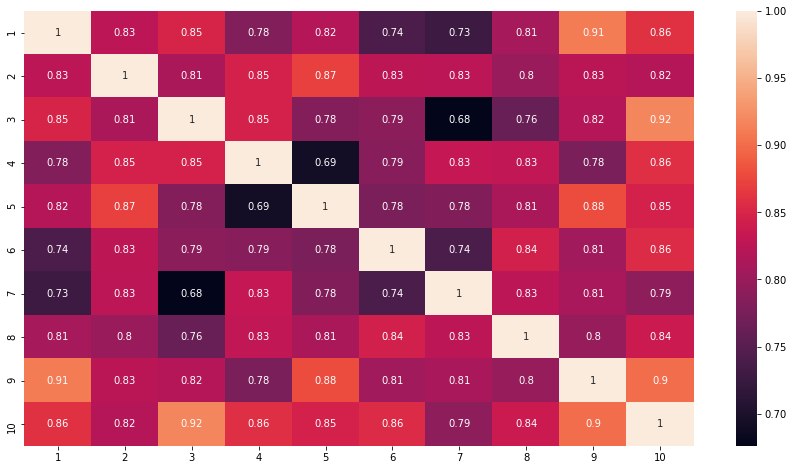

In [23]:
import seaborn as sns
df1 = pd.DataFrame(data=u, index= [1,2,3,4,5,6,7,8,9,10], columns=[1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize = (15,8))
sns.heatmap(df1, annot=True)

### для нахождения наиболее похожего пользователя по косинусной метрике для каждого я сравнил данного пользователя (строка) с другим пользователем (столбец)- наибольшее кос значение указывает на наибольшую схожесть     -- (по моему, выглядит симпатично)

###### b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [24]:
pd.DataFrame(mov_s)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4,4,9,4,1,6,10,7,9,6,9,2,8,6,6
1,9,2,5,10,7,8,10,5,6,2,1,6,8,9,7
2,1,6,8,8,4,9,3,8,10,5,2,6,8,1,6
3,6,1,9,7,7,9,2,3,5,1,6,6,3,2,7
4,3,7,3,5,7,9,9,6,2,9,1,2,8,10,6
5,8,3,7,3,8,6,1,8,8,6,1,9,4,10,1
6,9,8,4,8,8,10,6,1,1,2,9,5,2,7,2
7,4,1,6,4,3,10,4,4,2,8,7,9,3,8,3
8,2,7,7,6,10,6,8,9,8,6,10,1,7,10,4
9,5,10,8,8,9,7,2,9,9,10,8,8,8,6,10


### Ряды -юзеры, колонки- признаки фильмов. Сравниваем что для кого важно

<AxesSubplot:>

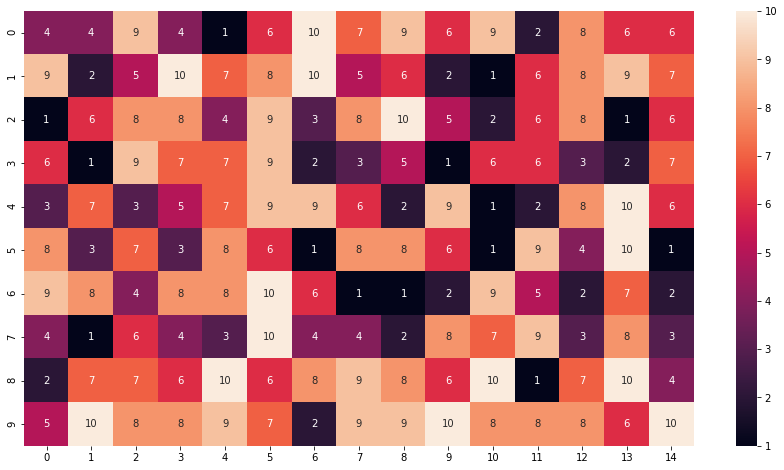

In [25]:
import seaborn as sns
df = pd.DataFrame(mov_s)
plt.figure(figsize = (15,8))
sns.heatmap(df, annot=True)

###### понятно что нельзя просто взять и выкинуть наугад 10 признаков.  Если все же маст-хэв, то оставлю первые 5 с наивысшим значение по каждому пользователю, так как они самые репрезентативные по конкретному типу. 

Использование методов для выбора признаков варьируется от одной проблемы к другой, а также от одного признака к другому в зависимости от того, является ли их тип категориальным или непрерывным.

In [27]:
user_1

array([ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6])

In [31]:
for x in user_1:
    if x > 7:
        print(x)

9
10
9
9
8


# ^ примерно вот так

In [32]:
summed = pd.DataFrame(mov_s)

In [35]:
summed.sum()

0     51
1     49
2     66
3     63
4     64
5     80
6     55
7     60
8     60
9     55
10    54
11    54
12    59
13    69
14    52
dtype: int64

### Либо как пример выше. Суммируем каждую колонку (обобщаем всех юзеров по каждой характеристике). Сортируем по убывающей и оставляем первые 5. 

In [37]:
s=summed.sum()
df[s.sort_values(ascending=False).index[:5]]

,5,13,2,4,3
0,6,6,9,1,4
1,8,9,5,7,10
2,9,1,8,4,8
3,9,2,9,7,7
4,9,10,3,7,5
5,6,10,7,8,3
6,10,7,4,8,8
7,10,8,6,3,4
8,6,10,7,10,6
9,7,6,8,9,8


### Сжали характеристики с 15 до 5.

### Есть готовые методики в пакетах python sklearn. Важно также всегда проверять, насколько сбалансирован наш набор. Большой дисбаланс между классами меньшинства и большинства отрицательно повлияет на модель в том смысле, что она будет наивно предсказывать только класс большинства. 
  Отбор признаков с помощью χ2

Тест χ2 (Распределение хи-квадратએ) используется в статистике для проверки независимости двух событий. Учитывая данные двух переменных, мы можем получить наблюдаемое число OOO и ожидаемое число EEE. χ2 измеряет, как ожидаемое число EEE и наблюдаемое число OOO отклоняются друг от друга.

При отборе признаков, поскольку χ2 проверяет степень независимости между двумя переменными, а мы хотим сохранить только признаки, наиболее зависимые от метки, то будем вычислять χ2 между каждым признаком и меткой, сохраняя только kkk признаки с наибольшими значениями. Будет правильно использовать SelectKBest и χ2 из модуля sklearn.feature_selection. 

Отбор признаков с использованием рекурсивного исключения признаков (RFE): 
 
    - цель recursive feature elimination (RFE), исключения рекурсивных признаков, — выбрать признаки путем рекурсивного рассмотрения все меньших и меньших наборов признаков.
    
Отбор признаков с использованием случайного леса (Random Forest) :

   -  Данные делятся на группы и характеристики одной группы сопоставляются с другими группами. Основная цель этих расщеплений — максимально возможно уменьшить количество «шумов» таких, как энтропия и коэффициент Джиниએ. Эти деревья, основанные на моделях могут рассчитать, насколько важен признак, рассчитав степень уменьшения «шумов» за счёт этого признака.


# Задание 2
Упражнения по вычислению производных (на python и на бумаге)

In [42]:
import sympy as sym

In [56]:
x=sym.Symbol('x')
y=sym.Symbol('y')
tg=sym.Symbol('tg')

In [44]:
x**3+y**2

x**3 + y**2

In [45]:
sym.diff(x**3+y**2, x, 1)

3*x**2

In [46]:
sym.diff(x**3+y**2, x, 3)

6

In [47]:
sym.diff(x**3+y**2, y, 1)

2*y

In [48]:
x**3+(y**2+ 2*x)**5

x**3 + (2*x + y**2)**5

In [49]:
sym.diff(x**3+(y**2+ 2*x)**5, x, 1)

3*x**2 + 10*(2*x + y**2)**4

In [50]:
sym.diff(x**3+(y**2+ 2*x)**5, x, 2)

2*(3*x + 40*(2*x + y**2)**3)

In [51]:
sym.diff(x**3+(y**2+ 2*x)**5, x, 3)

6*(80*(2*x + y**2)**2 + 1)

In [52]:
sym.diff(x**3+(y**2+ 2*x)**5, y, 10)

3628800

## на бумаге

x**3+y**2

по х =  х^3 -> 3x^2 -> 6x -> 6

по у =  y^2 -> 2y -> 2


###### x**3+(y**2+ 2*x)**5

по х  =  3x^2 +10*(2x+y^2)^4  -> 2*(3x+40(2x+y^2)^3) -> 6*(80*(2x+y^2)^2 +1) -> 1920*(2x+y^2) -> 3840

по y  =  10y(2x + y^2)^4 -> 10(2x + y^2)^3*(2x+9y^2) -> 240y(2x + y^2)^2 * (2x + 3y^2) -> 240(2x+y^2)(8y^4+12y^2)+(2x +y^2)^2)

    ->  480y(8y^4 + 40y^2(2x + y^2)+15(2x+y^2)^2)  ->  7200(8y^4+12y^2(2x +y^2)+(2x + y^2)^2) 
    
    ->  201600y(2x +3y^2)  -> 201600(2x +9^2) -> 3628800y  ->  3628800     

### Теперь то, что появилось в ссылке к заданию позже

tg^2(sin(x)+cos(2x+3))  ---

ddx[tan**2*(cos(2x+3)+sin(x))]
=2tan(cos(2x+3)+sin(x))⋅ddx[tan(cos(2x+3)+sin(x))]
=2tan(cos(2x+3)+sin(x))*sec**2(cos(2x+3)+sin(x))⋅ddx[cos(2x+3)+sin(x)]
=2tan(cos(2x+3)+sin(x))*sec**2(cos(2x+3)+sin(x))(ddx[cos(2x+3)]+ddx[sin(x)])
=2tan(cos(2x+3)+sin(x))*sec**2(cos(2x+3)+sin(x))((−sin(2x+3))⋅ddx[2x+3]+cos(x))
=2tan(cos(2x+3)+sin(x))*sec**2(cos(2x+3)+sin(x))(−(2⋅ddx[x]+ddx[3])sin(2x+3)+cos(x))
=2tan(cos(2x+3)+sin(x))*sec**2(cos(2x+3)+sin(x))(−(2⋅1+0)sin(2x+3)+cos(x))
=2(cos(x)−2sin(2x+3))*sec**2(cos(2x+3)+sin(x))tan(cos(2x+3)+sin(x))

2(cos(x)−2sin(2x+3))sec2(cos(2x+3)+sin(x))tan(cos(2x+3)+sin(x))

x=1
###### tg^2(sin(1)+cos(2+3))

2(cos−2sin(5))*sec**2(cos(5)+sin)*tan(cos(5)+sin)
 
 

In [71]:
np.sin(1)+np.cos(5)

1.1251331702711227

In [83]:
2*np.tan(np.sin(1)+np.cos(5))

4.186575559122884

# Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [5]:
from scipy.optimize import minimize
import numpy as np

### функция Розенброка

In [6]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

### ... вам также известны значения функции fx в точках x

In [73]:
x0 = np.array([1.2, 0.8, 0.6, 2.3, 1.3])  # ЭТО ИЗВЕСТНЫЕ Х- ЗНАЧЕНИЯ ФУНКЦИИ С ПАРАМЕТРАМИ А и В

In [10]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 400
         Function evaluations: 675


In [11]:
res.x

array([1., 1., 1., 1., 1.])

In [13]:
rosen(res.x)

2.900252727916345e-17

In [15]:
res.nit   #  количество иттераций

400

### Минимизация MSE  ( Mean Square Error)

In [21]:
ALPHA_TRUE = 0.5 # используется только для генерации некоторых тестовых данных 

def model(params, X):
    # здесь реализовываю нашу реальную модель 
    alpha = params[0]
    y_pred = np.exp(-alpha * X)
    return y_pred

def sum_of_squares(params, X, Y):
    y_pred = model(params, X)
    obj = np.sqrt(((y_pred - Y) ** 2).sum())
    return obj


# создаем данные для тестирования

Y = model([ALPHA_TRUE], x0) # моделируем У от нашего оригинального х0


# выполняем подгонку, чтобы найти оптимальные параметры 
# начальное значение для alpha (предположение)
alpha_0 = 0.1

res = minimize(sum_of_squares, [alpha_0, ], args=(x0, Y), tol=1e-3, method="Powell")
print(res)

   direc: array([[4.32201649e-13]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 209
     nit: 9
  status: 0
 success: True
       x: array([0.5])


# Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50.
Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [27]:
import matplotlib.pyplot as plt

### Посчитайте среднее для каждой выборки.

In [78]:
of_20 = np.random.randint(0, 250, size = 20)

In [79]:
y_mean = []
for v in range(1000):
    y_mean.append(np.mean(np.random.randint(0, 20, size = 50)))

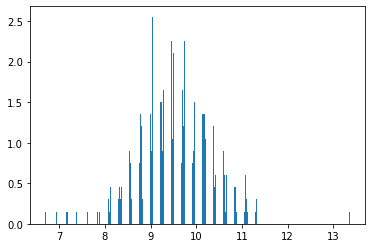

In [80]:
h = plt.hist(y_mean, bins=1000, density=True)

In [81]:
y_mean

[9.64,
 9.0,
 10.76,
 8.48,
 9.76,
 7.74,
 10.22,
 11.14,
 9.74,
 10.04,
 10.0,
 9.8,
 8.4,
 9.4,
 10.58,
 10.68,
 8.94,
 9.86,
 10.66,
 10.26,
 9.32,
 10.46,
 9.56,
 8.84,
 8.48,
 10.2,
 8.2,
 9.04,
 10.08,
 9.58,
 9.52,
 9.2,
 9.7,
 10.8,
 10.98,
 9.86,
 8.94,
 9.72,
 10.36,
 8.96,
 8.5,
 10.66,
 10.56,
 10.04,
 9.28,
 10.5,
 8.16,
 9.96,
 9.34,
 10.38,
 10.68,
 9.46,
 9.04,
 9.0,
 8.84,
 8.74,
 10.18,
 9.34,
 9.52,
 11.2,
 9.6,
 9.8,
 11.38,
 9.6,
 10.2,
 8.76,
 10.2,
 9.92,
 9.28,
 9.44,
 8.92,
 9.14,
 8.52,
 8.8,
 10.14,
 9.4,
 8.58,
 10.18,
 8.66,
 9.12,
 9.88,
 9.78,
 10.42,
 9.52,
 9.12,
 10.14,
 9.04,
 10.52,
 9.38,
 9.22,
 9.56,
 10.22,
 11.72,
 9.96,
 8.76,
 8.94,
 10.62,
 10.7,
 9.62,
 8.26,
 9.28,
 10.16,
 8.84,
 8.94,
 10.92,
 9.28,
 9.4,
 10.36,
 9.74,
 8.56,
 9.86,
 9.66,
 9.96,
 10.26,
 9.5,
 9.16,
 8.32,
 8.4,
 9.58,
 10.7,
 10.56,
 10.84,
 11.12,
 8.64,
 8.44,
 9.66,
 10.06,
 9.1,
 9.78,
 10.0,
 9.78,
 9.42,
 11.26,
 10.78,
 9.66,
 9.9,
 8.86,
 9.46,
 10.06,
 8.78,
 

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

###### python

In [133]:
numbers=np.random.rand(9,9)

In [136]:
np.linalg.eig(numbers)      # 1) собственные значения а внизу 2) вектора собственных значений

(array([ 4.42528955+0.j        , -0.8874813 +0.j        ,
        -0.47849107+0.52614322j, -0.47849107-0.52614322j,
         0.4681977 +0.58984202j,  0.4681977 -0.58984202j,
        -0.01859013+0.j        ,  0.17242741+0.j        ,
         0.51100946+0.j        ]),
 array([[ 0.27262799+0.j        ,  0.66819109+0.j        ,
          0.22094128+0.23281066j,  0.22094128-0.23281066j,
          0.35946635-0.18400985j,  0.35946635+0.18400985j,
          0.29596584+0.j        , -0.32166382+0.j        ,
          0.28955099+0.j        ],
        [ 0.30502746+0.j        ,  0.36408395+0.j        ,
         -0.21794087-0.08310021j, -0.21794087+0.08310021j,
         -0.33170222-0.15886363j, -0.33170222+0.15886363j,
          0.71919865+0.j        , -0.6721592 +0.j        ,
         -0.28305243+0.j        ],
        [ 0.35751869+0.j        , -0.3798257 +0.j        ,
          0.12281735-0.30909292j,  0.12281735+0.30909292j,
          0.45366688+0.j        ,  0.45366688-0.j        ,
         -0.06

In [135]:
np.linalg.eigvals(numbers)  # собственные значения

array([ 4.42528955+0.j        , -0.8874813 +0.j        ,
       -0.47849107+0.52614322j, -0.47849107-0.52614322j,
        0.4681977 +0.58984202j,  0.4681977 -0.58984202j,
       -0.01859013+0.j        ,  0.17242741+0.j        ,
        0.51100946+0.j        ])

## с целыми числами 

In [148]:
vectors = np.random.randint(100, size=(10, 10))
vectors

array([[38, 29, 13, 90, 28, 29,  4, 95, 55, 15],
       [47, 36, 60, 32, 33, 99, 31, 81, 86,  9],
       [62, 92, 10, 35, 39, 17, 50, 44, 49, 36],
       [70, 34, 26,  7, 59, 80,  5, 24, 22, 49],
       [31, 85, 71, 46, 66, 15, 57, 57,  3, 84],
       [20, 18, 51, 55, 22, 41,  7, 67, 88, 10],
       [87, 71, 42, 78, 75, 20, 98, 18, 37, 92],
       [37, 97, 47, 91, 14, 82, 64, 38, 72, 82],
       [70, 12, 55, 14, 74, 94, 95,  9, 72, 40],
       [81, 68, 52, 92, 92, 30, 65, 52, 95, 22]])

In [149]:
np.linalg.eig(vectors) # 1)array собственные значения  2)array вектора собственных значений

(array([ 500.39726677 +0.j        , -100.91569574 +0.j        ,
          60.02762161+63.11115498j,   60.02762161-63.11115498j,
         -44.36693072+49.15874261j,  -44.36693072-49.15874261j,
          23.45215732+33.08474134j,   23.45215732-33.08474134j,
         -24.85363372+16.43008955j,  -24.85363372-16.43008955j]),
 array([[-0.23846241+0.j        ,  0.39982875+0.j        ,
         -0.29154129-0.00750282j, -0.29154129+0.00750282j,
          0.10475181+0.1622139j ,  0.10475181-0.1622139j ,
          0.52572398+0.09816165j,  0.52572398-0.09816165j,
          0.29474173+0.25169851j,  0.29474173-0.25169851j],
        [-0.30822799+0.j        , -0.05392623+0.j        ,
         -0.14951469-0.33079371j, -0.14951469+0.33079371j,
          0.28936531+0.12869581j,  0.28936531-0.12869581j,
         -0.07017805-0.20845687j, -0.07017805+0.20845687j,
         -0.08943543-0.01826064j, -0.08943543+0.01826064j],
        [-0.27394285+0.j        ,  0.00543845+0.j        ,
         -0.0825143 -0.0186

In [151]:
np.linalg.eigvals(vectors) # 1)array собственные значения  

array([ 500.39726677 +0.j        , -100.91569574 +0.j        ,
         60.02762161+63.11115498j,   60.02762161-63.11115498j,
        -44.36693072+49.15874261j,  -44.36693072-49.15874261j,
         23.45215732+33.08474134j,   23.45215732-33.08474134j,
        -24.85363372+16.43008955j,  -24.85363372-16.43008955j])

### на бумаге

матрица | 7 3 |
    A=  | 3 -1|  
                   LI = L* | 1 0 | = | L 0 |
                           | 0 1 |   | 0 L |
                   A - LI= | 7 3 | - | L 0 |
                           | 3-1 |   | 0 L |
                           
                          =| 7 - L   3  |
                           |   3   -1-L |
                           
                      det  | 7-L    3 |
                           |  3  -1-L |
                           
                          = (7-L)(-1-L)-(3)(3)
                          = -7-7L + L +L**2 -9
                          = L**2-6L-16
                 L**2-6L-16 = 0  
                 (L-8)(L+2)  = 0
                 L = 8  ||  L = -2   <---  это наши СОБСТВЕННЫЕ ЗНАЧЕНИЯ
                 
       ДЛЯ ВЕКТОРОВ:   
                   | 7 - L   3  |
                   |   3   -1-L |  
                   
             L = 8:
                   | 7 - 8   3  |  =  | -1  3 | -  назовем матрица В
                   |   3   -1-8 |     |  3 -9 |
                   
               Bx = 0
                   | -1  3 | | x1 | = | 0 |
                   |  3 -9 | | x2 |   | 0 |
                   
                  [ -1  3 | 0 ]  ->  [ -1  3 | 0 ]    -x1 +3x2 = 0
                  [  3 -9 | 0 ]      [  0  0 | 0 ]     3x2 = x1
                  3R1+R2 -> R2          x1 x2        let x2 = 1
                                                      3(1) = x1 
                                                      x1 = 3
           
           
    Собственные значения --> L = 8  ||  L = -2
             Вектор      --> | 3 |
                             | 1 |
                             
       Проверка    | 7 3 | | 3 | = 8 | 3 |
                   | 3 -1| | 1 |     | 1 |
                   
                       | 24 |  =  | 24 |
                       |  8 |     |  8 |